In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.animation as animation
from scipy.sparse import dok_matrix
import multiprocessing as mp
import scipy as sp
import matplotlib.ticker as ticker
import project

In [2]:
#General plot parameters and size definition
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({"axes.grid" : True})
plt.rcParams.update({"axes.titlesize": 18})
plt.rcParams.update({"axes.labelsize": 15})

In [3]:
def spikelet_fun(strength,num_neurons):
    return (strength*  -7.26668869e+01 - 1.32272004e-03) *((num_neurons)*-1.84361670e-01)

In [43]:
#loading up the parameters

params_HH = project.utils.load_HH()
params_LIF = project.utils.load_LIF()
params_IZH = project.utils.load_ISH()
params_ML = project.utils.load_ML()

#time parameters
t_final = 600
dt = 0.01



#Other constant parameters
num_neurons = 5
#Variation for the initial conditions
#volt_var = np.random.normal(0,5,num_neurons)
#rec_var = np.random.normal(0,1,num_neurons)
volt_var = 0
rec_var = 0
Isyn = 0.0
tau = 0.65
V0 = -65 * np.ones(num_neurons) + volt_var
y0 = -65 * np.ones(num_neurons) + volt_var
w0 = 0 * np.ones(num_neurons) + rec_var
u0 = 0 * np.ones(num_neurons) + rec_var
n0 = 0 * np.ones(num_neurons) + rec_var
m0 = 0 * np.ones(num_neurons) + rec_var
h0 = 0 * np.ones(num_neurons) + rec_var
order = 2


#fixing random seed
np.random.seed(1234)

#generating the intensities
I_HH = np.zeros((int(t_final/dt),num_neurons))
I_IF = np.zeros((int(t_final/dt),num_neurons))
I_IZH = np.zeros((int(t_final/dt),num_neurons))
I_ML = np.zeros((int(t_final/dt),num_neurons))

for i in range(0,num_neurons):
    #x_normal = np.random.normal(0,5,int(t_final/dt))
    #x_if = np.random.normal(0,1.5,int(t_final/dt))
    #I_HH[:,i] = 2.5 * (1 + 1*x_normal)
    #I_IF[:,i] = 2.5 * (1 + 1*x_if)
    #I_IZH[:,i] = 2.5 * (1 + 1*x_normal)
    #I_ML[:,i] = 2.5 * (1+ 1*x_normal)
    I_HH[:,i] = 0
    I_IF[:,i] = 0 
    I_IZH[:,i] = 0
    I_ML[:,i] = 0 

for i in range(15000,40000):
    I_HH[i,0] =1
    I_IF[i,0] = 1
    I_IZH[i,0] = 1
    I_ML[i,0] = 1

HH_gap_junction = np.zeros((int(t_final/dt),num_neurons))
HH_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

IF_gap_junction = np.zeros((int(t_final/dt),num_neurons))
IF_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

IZH_gap_junction = np.zeros((int(t_final/dt),num_neurons))
IZH_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

ML_gap_junction = np.zeros((int(t_final/dt),num_neurons))
ML_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

In [44]:
#Creating the Electrical and Chemical connectivity matrices, in this case for 10 neurons
E_matrix,seed, ratio = project.utils.create_matrix('random',num_neurons,synapse_type='electrical',connection_fraction=1)
C_matrix, seed, ratio = project.utils.create_matrix('random',num_neurons,connection_fraction=1)

In [94]:
dataHH, completeHH, matrixHH, synaptic = project.models.HH_Neuron_Network_tests(dt,t_final,order,V0,n0,m0,h0,*params_HH,I_HH,0.0,0.011,tau,E_matrix,C_matrix,HH_gap_junction,HH_synaptic_current)
dataIF, completeIF, matrixIF, synaptic = project.models.LIF_Neuron_Network_tests(dt, t_final,order,y0,*params_LIF,I_IF,0.0,0.011,tau,spikelet_fun(0.011,5),E_matrix,C_matrix, IF_gap_junction, IF_synaptic_current)
dataIZH, completeIZH, matrixIZH, synaptic = project.models.IZH_Neuron_Network_tests(dt,t_final,order,y0,u0,I_IZH,0.0,*params_IZH,0.04,tau,E_matrix,C_matrix,IZH_gap_junction,IZH_synaptic_current)
dataML, completeML, matrixML, synaptic = project.models.ML_Neuron_Network_tests(dt,t_final,2,y0,w0,*params_ML,I_ML,0.0,0.008,tau,E_matrix,C_matrix, ML_gap_junction, ML_synaptic_current)

Text(0, 0.5, 'Voltage (mV)')

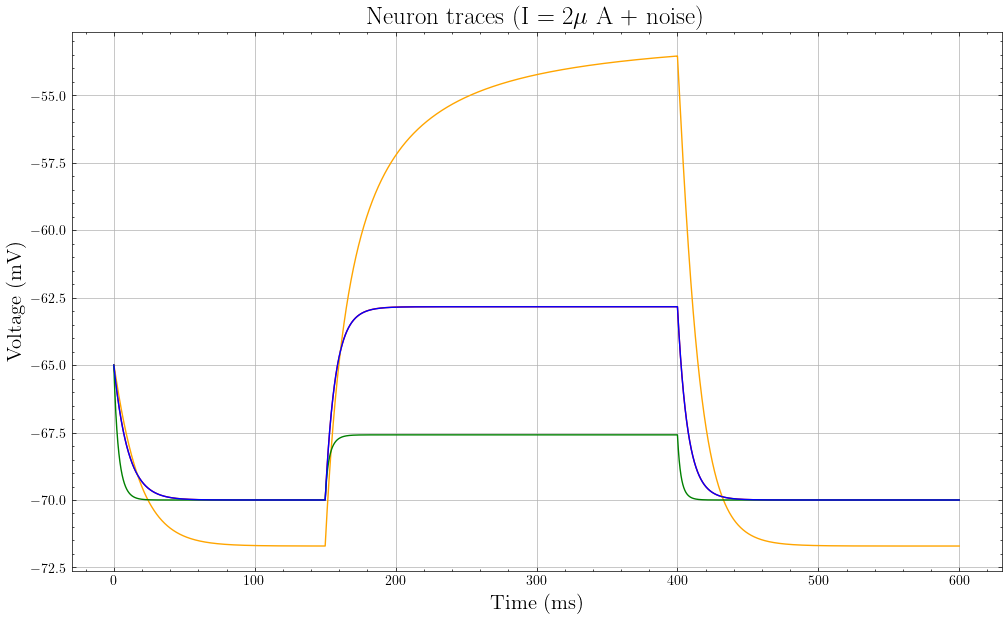

In [95]:
time = np.linspace(0,t_final,int(t_final/dt))
plt.plot(time,dataHH[:,0], color = 'red')
plt.plot(time,dataML[:,0], color = 'orange')
plt.plot(time,dataIZH[:,0], color = 'green')
plt.plot(time,dataIF[:,0], color = 'blue')
plt.title(r'Neuron traces (I = 2$\mu$ A + noise)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
#plt.xlim(1200,2300)
#plt.ylim(-65,25)

Text(0, 0.5, 'Voltage (mV)')

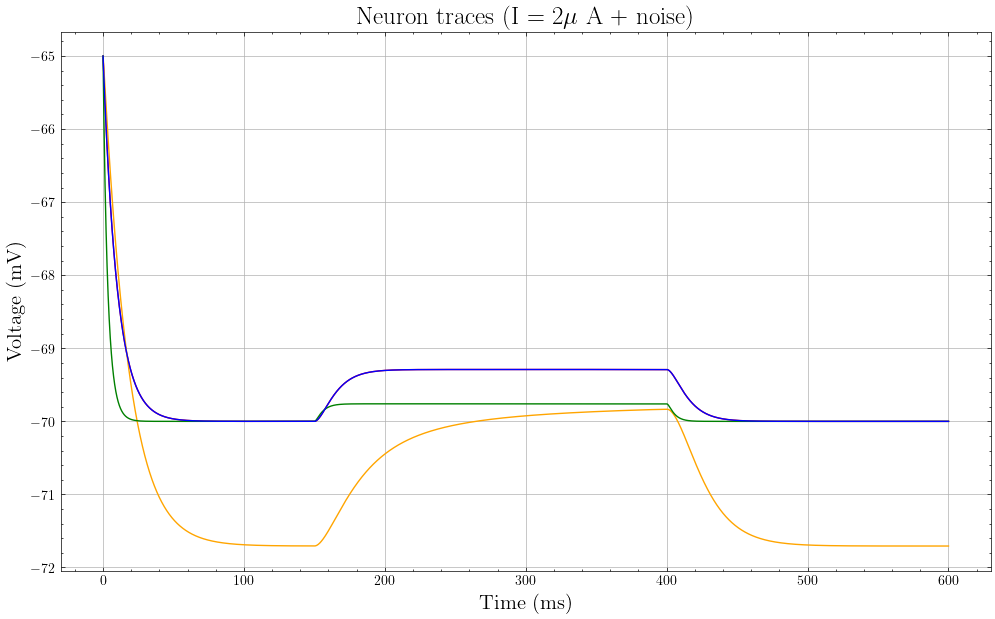

In [96]:
time = np.linspace(0,t_final,int(t_final/dt))
plt.plot(time,dataHH[:,1], color = 'red')
plt.plot(time,dataML[:,1], color = 'orange')
plt.plot(time,dataIZH[:,1], color = 'green')
plt.plot(time,dataIF[:,1], color = 'blue')
plt.title(r'Neuron traces (I = 2$\mu$ A + noise)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
#plt.xlim(1200,2300)
#plt.ylim(-65,25)

In [97]:
El = -70
variationHHgj = np.zeros((len(dataHH[:,0]),1))
deltav1 = np.array(abs(El-dataHH[:,0]))
deltav2 = np.array(abs(El-dataHH[:,1]))
gj_transmission = deltav2 / deltav1
variationHHgj[:,0] = gj_transmission

variationLIFgj = np.zeros((len(dataIF[:,0]), 1))
deltav1 = np.array(abs(El - dataIF[:,0]))
deltav2 = np.array(abs(El - dataIF[:,1]))
gj_transmission = deltav2 / deltav1
variationLIFgj[:,0] = gj_transmission

variationIsh = np.zeros((len(dataIZH[:,0]), 1))
deltav1 = np.array(abs(El - dataIZH[:,0]))
deltav2 = np.array(abs(El - dataIZH[:,1]))
gj_transmission = deltav2 / deltav1
variationIsh[:,0] = gj_transmission

variationIsh2 = np.zeros((len(dataIZH[:,0]), 1))
deltav1 = np.array(abs(El - dataIZH[:,0]))
deltav2 = np.array(abs(El - dataIZH[:,1]))
gj_transmission = deltav2 / deltav1
variationIsh2[:,0] = gj_transmission

variationML = np.zeros((len(dataML[:,0]), 1))
deltav1 = np.array(abs(-71.70562658780625- dataML[:,0]))
deltav2 = np.array(abs(-71.70562658780625 - dataML[:,1]))
gj_transmission = deltav2 / deltav1
variationML[:,0] = gj_transmission

variationML2 = np.zeros((len(dataML[:,0]), 1))
deltav1 = np.array(abs(-71.70562658780625- dataML[:,0]))
deltav2 = np.array(abs(-71.70562658780625 - dataML[:,1]))
gj_transmission = deltav2 / deltav1
variationML2[:,0] = gj_transmission


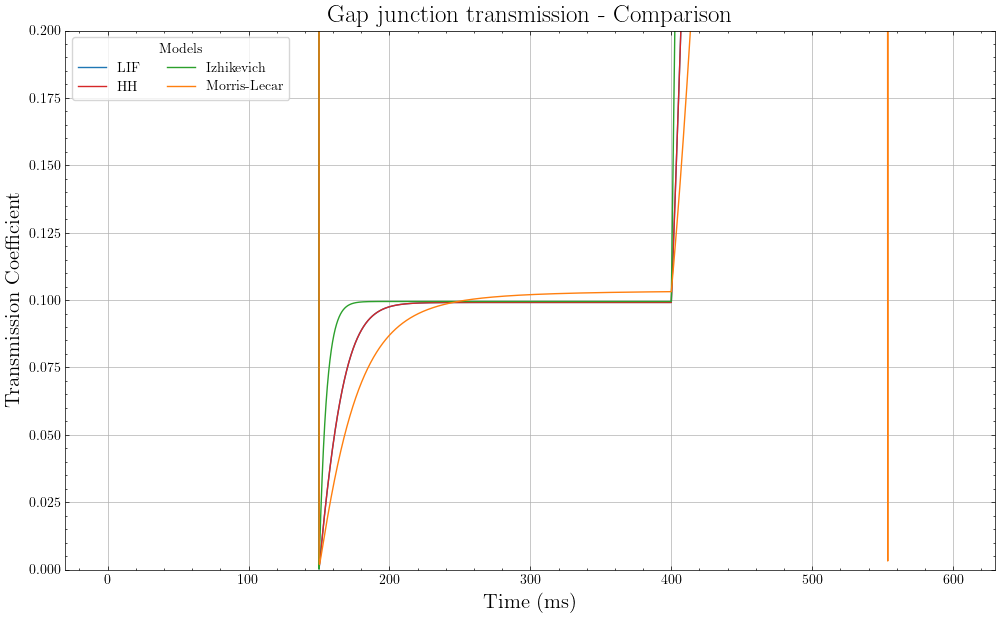

In [98]:
t_final = 600
time = np.linspace(0,t_final,int(t_final/dt))
plt.xlabel('Time (ms)')
plt.ylabel('Transmission Coefficient')

#plt.xlim(0,250)
plt.ylim(0,1.01)
plt.ylim(0,0.2)

plt.plot(time,variationLIFgj, color = 'tab:blue', label = 'LIF')
plt.plot(time,variationHHgj, color = 'tab:red' ,label = 'HH')
plt.plot(time,variationIsh, color = 'tab:green',label = 'Izhikevich')
plt.plot(time,variationML, color = 'tab:orange', label = 'Morris-Lecar')
#plt.plot(time,variationIsh2, color = 'red',label = 'Ishikevich2')
#plt.plot(time,variationML2, color = 'black', label = 'Morris-Lecar2')
plt.title('Gap junction transmission - Comparison')
plt.legend(title='Models',ncols=2,frameon=True)

In [99]:
El = -70
variationHHgj = np.zeros((len(dataHH[:,0]),1))
deltav1 = np.array(abs(El-dataHH[:,0]))
deltav2 = np.array(abs(El-dataHH[:,2]))
gj_transmission = deltav2 / deltav1
variationHHgj[:,0] = gj_transmission

variationLIFgj = np.zeros((len(dataIF[:,0]), 1))
deltav1 = np.array(abs(El - dataIF[:,0]))
deltav2 = np.array(abs(El - dataIF[:,2]))
gj_transmission = deltav2 / deltav1
variationLIFgj[:,0] = gj_transmission

variationIsh = np.zeros((len(dataIZH[:,0]), 1))
deltav1 = np.array(abs(El - dataIZH[:,0]))
deltav2 = np.array(abs(El - dataIZH[:,2]))
gj_transmission = deltav2 / deltav1
variationIsh[:,0] = gj_transmission

variationIsh2 = np.zeros((len(dataIZH[:,0]), 1))
deltav1 = np.array(abs(El - dataIZH[:,0]))
deltav2 = np.array(abs(El - dataIZH[:,2]))
gj_transmission = deltav2 / deltav1
variationIsh2[:,0] = gj_transmission

variationML = np.zeros((len(dataML[:,0]), 1))
deltav1 = np.array(abs(-71.70562658780625- dataML[:,0]))
deltav2 = np.array(abs(-71.70562658780625 - dataML[:,2]))
gj_transmission = deltav2 / deltav1
variationML[:,0] = gj_transmission

variationML2 = np.zeros((len(dataML[:,0]), 1))
deltav1 = np.array(abs(-71.70562658780625- dataML[:,0]))
deltav2 = np.array(abs(-71.70562658780625 - dataML[:,2]))
gj_transmission = deltav2 / deltav1
variationML2[:,0] = gj_transmission


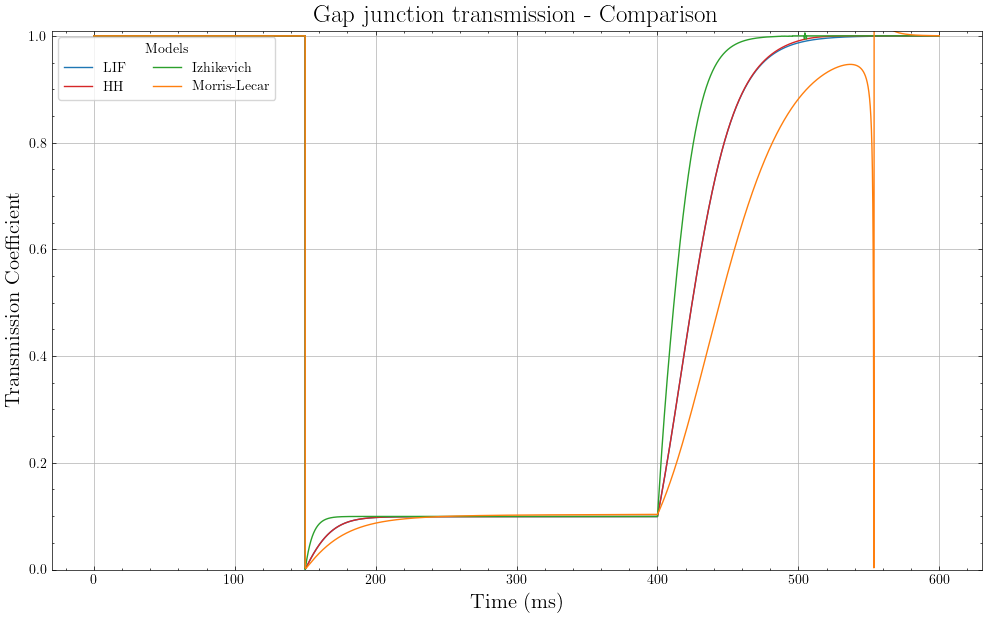

In [100]:
t_final = 600
time = np.linspace(0,t_final,int(t_final/dt))
plt.xlabel('Time (ms)')
plt.ylabel('Transmission Coefficient')

#plt.xlim(0,250)
plt.ylim(0,1.01)

plt.plot(time,variationLIFgj, color = 'tab:blue', label = 'LIF')
plt.plot(time,variationHHgj, color = 'tab:red' ,label = 'HH')
plt.plot(time,variationIsh, color = 'tab:green',label = 'Izhikevich')
plt.plot(time,variationML, color = 'tab:orange', label = 'Morris-Lecar')
#plt.plot(time,variationIsh2, color = 'red',label = 'Ishikevich2')
#plt.plot(time,variationML2, color = 'black', label = 'Morris-Lecar2')
plt.title('Gap junction transmission - Comparison')
plt.legend(title='Models',ncols=2,frameon=True)